In [1]:
import json
from backend.models import UserDocument, CV, CVData
from ai_module.lg_models import CVGenState

# Charger les données de test
with open('../../data/user_test_user.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

# Créer un UserDocument à partir des données de test
user_doc = UserDocument(**test_data)

# Créer un CVGenState à partir du UserDocument
# Utilisons "CV par défaut" comme nom de CV
cv_state = CVGenState.from_user_document(user_doc, "cv_1")

# Afficher les informations principales du CVGenState
print(f"Nom: {cv_state.head.name}")
print(f"Titre brut: {cv_state.head.title_raw}")
print(f"Titre raffiné: {cv_state.head.title_refined}")
print(f"Email: {cv_state.head.mail}")
print(f"Téléphone: {cv_state.head.tel_refined}")
print(f"\nNombre d'expériences: {len(cv_state.experiences)}")
print(f"Nombre de formations: {len(cv_state.education)}")
print(f"\nCompétences brutes: {cv_state.skills_raw}")
print(f"Langues brutes: {cv_state.langues_raw}")
print(f"Centres d'intérêt: {cv_state.hobbies_refined}")
print(f"\nPoste visé brut: {cv_state.job_raw}")

Nom: Alexis de Monts
Titre brut: Data Engineer | Machine Learning Engineer | Cloud Architect
Titre raffiné: 
Email: alexis.demonts.s@gmail.com
Téléphone: 

Nombre d'expériences: 8
Nombre de formations: 3

Compétences brutes: Cloud (GCP, AWS), DevOps (CI/CD, Docker), MLOps, Data Science, Machine Learning, Data Engineering, Python, SQL, Git, Flutter
Langues brutes: Francais (natif), Anglais (courant), Italien (fonctionnel)
Centres d'intérêt: Technologies emergentes, developpement d'applications, voyages, engagement humanitaire

Poste visé brut: Fiche de Poste - Machine Learning Engineer

Localisation : Paris, France (Hybrid)

Type de Contrat : CDI

Experience : 3+ ans

Salaire : 55k - 75k EUR selon experience

Secteur : Tech / IA / Data


A propos de nous

Nous sommes une startup innovante specialisee dans l'intelligence artificielle et le traitement des donnees a grande echelle. Nous developpons des solutions de Machine Learning et Deep Learning pour optimiser la prise de decision et au

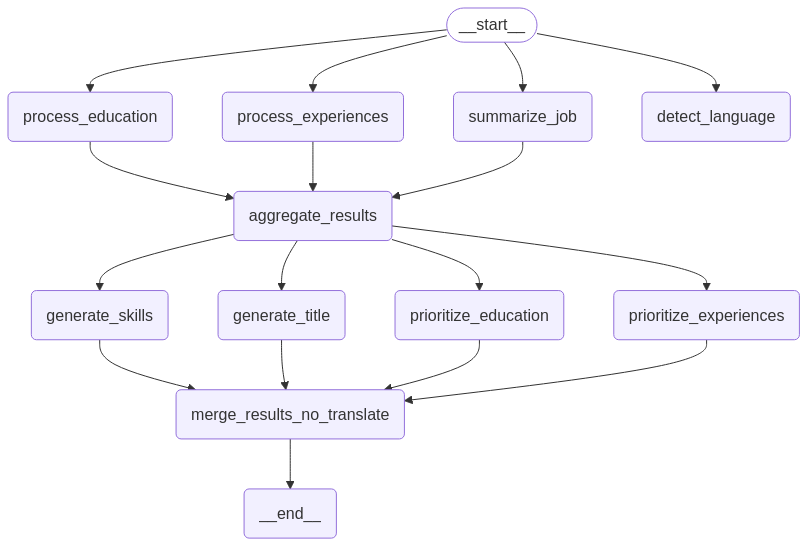

In [2]:
# Importer le graphe compilé pour la génération de CV
from ai_module.chains_gen_cv.global_chain import compiled_gencv_graph_no_translate
from IPython.display import Image, display

display(Image(compiled_gencv_graph_no_translate.get_graph().draw_mermaid_png()))

In [3]:
# Tester le graphe compilé pour la génération de CV
result = compiled_gencv_graph_no_translate.invoke(cv_state)


In [4]:
# Enregistrer le résultat dans un fichier JSON
output_path = '../../data/generated_cv_result.json'
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=2)
print(f"Résultat enregistré dans {output_path}")


Résultat enregistré dans ../../data/generated_cv_result.json


In [5]:
# Afficher les champs les plus importants du résultat final
print("\nRésultat final du graphe :")
print(f"Nom: {result['head']['name']}")
print(f"Titre généré: {result['head']['title_generated']}")
print(f"Email: {result['head']['mail']}")
print(f"Téléphone: {result['head']['tel_refined']}")
print(f"\nNombre d'expériences: {len(result['experiences'])}")
print(f"Nombre de formations: {len(result['education'])}")
print(f"\nCompétences: {result['competences']}")
print(f"Langues: {result['langues']}")
print(f"Centres d'intérêt: {result['hobbies_refined']}")
print(f"\nPoste visé raffiné: {result['job_refined']}")


Résultat final du graphe :
Nom: Alexis de Monts
Titre généré: Machine Learning Engineer | Data Engineer | MLOps Specialist
Email: alexis.demonts.s@gmail.com
Téléphone: 

Nombre d'expériences: 5
Nombre de formations: 3

Compétences: {'Compétences techniques': ['À compléter']}
Langues: []
Centres d'intérêt: Technologies emergentes, developpement d'applications, voyages, engagement humanitaire

Poste visé raffiné: Nous recherchons un Machine Learning Engineer expérimenté (3+ ans) pour rejoindre notre startup innovante à Paris, spécialisée en IA et traitement de données. Le candidat concevra, entraînera et déploiera des modèles de Machine Learning et Deep Learning, collaborant avec des data scientists et équipes DevOps pour optimiser les performances et l'intégration des modèles. Une maîtrise des langages Python, SQL et des outils MLOps est requise. Nous offrons un environnement dynamique, des projets innovants, une culture d'innovation et un package attractif (55k - 75k EUR). Postulez en

In [4]:
# Définir le chemin du fichier de sortie
output_path = '../../data/generated_cv_result.json'
import json
from ai_module.lg_models import CVGenState


# Charger l'état du CV à partir du fichier JSON
with open(output_path, 'r', encoding='utf-8') as f:
    cv_state_dict = json.load(f)

# Créer une instance de CVGenState à partir du dictionnaire
cv_state = CVGenState(**cv_state_dict)

# Mettre à jour le champ language_cv à "it" pour l'italien
cv_state.language_cv = "it"



In [5]:
from ai_module.chains_gen_cv.global_chain import translate_cv_node

result_translate = translate_cv_node(cv_state)

result_translate

{'head': {'name': 'Alexis de Monts',
  'title_raw': 'Data Engineer | Machine Learning Engineer | Cloud Architect',
  'title_generated': 'Machine Learning Engineer | Data Engineer | MLOps Specialist',
  'title_refined': 'Ingénieur en Machine Learning | Ingénieur Data | Spécialiste MLOps',
  'mail': 'alexis.demonts.s@gmail.com',
  'tel_raw': '07 81 37 86 80',
  'tel_refined': '07 81 37 86 80'},
 'sections': {'experience': 'Expérience Professionnelle',
  'education': 'Formation',
  'skills': 'Compétences',
  'languages': 'Langues',
  'hobbies': "Centres d'Intérêt"},
 'experiences': [{'title_raw': 'Senior Data Scientist',
   'title_refined': 'Data Scientist Senior',
   'company_raw': 'EY',
   'company_refined': 'EY',
   'location_raw': 'Ville de Paris, Ile-de-France, France',
   'location_refined': 'Ville de Paris, Île-de-France, France',
   'dates_raw': 'fevrier 2023 - Present (2 ans 1 mois)',
   'dates_refined': 'février 2023 - Présent (2 ans 1 mois)',
   'description_raw': '',
   'descr